<h1 style="color:red; font-family:candara; font-size:300%; text-align:center;"> 
    Heart disease
</h1>

***

This data set comes from [this Kaggle database](https://www.kaggle.com/ronitf/heart-disease-uci)

The term heart disease describes a range of conditions that affect the heart, like blood vessel diseases (such as coronary artery disease), arrhythmia and congenital heart defects.

Heart disease is, [according to the WHO](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1) the number one cause of death globally. It takes the lives of about 18 million people every year and about 80% of them suffered from heart attacks or strokes.
Hence, the correct prediction of heart disease has a great importance within clinical data analysis and data mining turns the large collection of raw healthcare data into usable information to make informed decisions and predictions. 
This is specially important after knowing that "80% of premature heart disease and stroke is preventable".

Let's now look at the data from UCI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#pip install ipywidgets #Interactive Python
# jupyter nbextension enable --py widgetsnbextension
# jupyter nbextension enable --py widgetsnbextension --sys-prefix
# import ipywidgets as widgets
# from ipywidgets import interact, interact_manual



#Options for pandas
pd.options.display.max_colwidth = 100 #show more content in the dataframes

In [2]:
# On Windows path is with "\\" instead of "/"
df = pd.read_csv("C:\\Users\\cuspi\\Documents\\Databases\\Heart_disease\\heart.csv")
# print(df.unique())

In [3]:
print(df.columns)
df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The columns refer to:
- Age (years)
- sex (1 = male; 0 = female)
- cp = chest pain type (4 values)
- trestbps = resting blood pressure  (in mm Hg on admission to the hospital)
- chol = serum cholestoral in mg/dl
- fbs = fasting blood sugar (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg = resting electrocardiographic results (values 0,1,2)
- thalach = maximum heart rate achieved 
- exang = exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- slope = slope of the peak exercise ST segment
- ca = number of major vessels (0-3) colored by flourosopy
- thal = {3 = normal; 6 = fixed defect; 7 = reversable defect}
- target 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.age = df.age.astype('int')
df.sex = df.sex.astype('bool')
df.cp = df.cp.astype('int')
df.trestbps = df.trestbps.astype('int')
df.chol = df.chol.astype('int')
df.fbs = df.fbs.astype('bool')
df.restecg = df.restecg.astype('int')
df.thal = df.thal.astype('int')
df.target = df.target.astype('bool');

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int32
sex         303 non-null bool
cp          303 non-null int32
trestbps    303 non-null int32
chol        303 non-null int32
fbs         303 non-null bool
restecg     303 non-null int32
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int32
target      303 non-null bool
dtypes: bool(3), float64(1), int32(6), int64(4)
memory usage: 19.9 KB


In [6]:
np.sum(df.isnull())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
df.groupby('target').median() # it seems that people without the disease have a higher chol. value...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
False,58,True,0,130,249,False,0,142,1,1.4,1,1,3
True,52,True,2,130,234,False,1,161,0,0.2,2,0,2


# Data visualization

Text(0, 0.5, 'Fraction of population with disease')

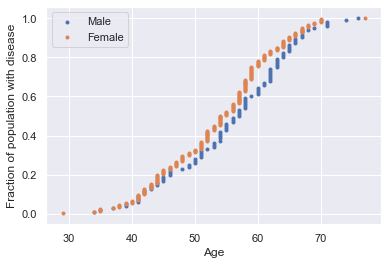

In [9]:
def ecdf(data):
    """Compute Empyrical Cumulative Distribution Function (ECDF) for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# x,y = ecdf(df.age)
# plt.scatter(x,y, marker='.', color='k')

xf, yf = ecdf(df[df.sex==False].age)
plt.scatter(xf,yf, marker='.', label='Male')

xm, ym = ecdf(df[df.sex==True].age)
plt.scatter(xm,ym, marker='.', label='Female')

plt.legend(loc='best')

plt.xlabel('Age')
plt.ylabel('Fraction of population with disease')

In [10]:
#Some definitions
dmax = df.max()
dmin = df.min()
n_m = df[df.sex==1].age.count()
n_f = df[df.sex==0].age.count()
(1/n_m)*np.ones(len(df[(df.target==1) & (df.sex==1)].age) );

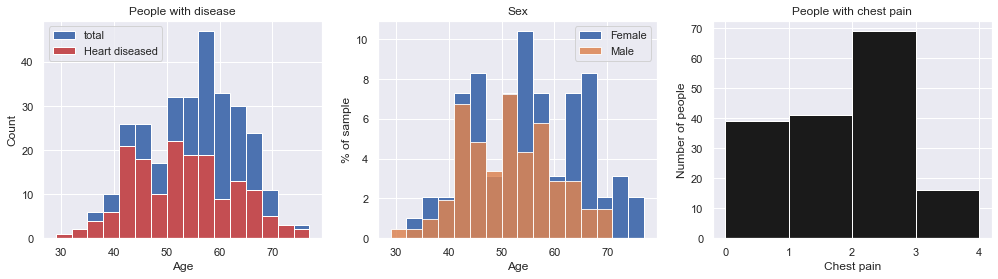

In [11]:
n_bins = np.linspace(dmin.age, dmax.age, int(np.sqrt(df.age.count())) ) #it's good practice to have the number of bins to be the sqrt(len(data))

fig, ax = plt.subplots(ncols =3, figsize = (17,4) )

ax[0].hist(df.age, bins=n_bins, color='b', label='total') ;
ax[0].hist(df[df.target==1].age, bins=n_bins, color='r',alpha=1, label = 'Heart diseased')

ax[0].legend(loc='best')
ax[0].set(title='People with disease', xlabel='Age', ylabel='Count');

#We have to present each of the diseased males or females with respect to the total number of each sample 
male_weights = (1/n_m)*np.ones(len(df[(df.target==1) & (df.sex==1)].age) )*100
female_weights = (1/n_f)*np.ones(len(df[(df.target==1) & (df.sex==0)].age) )*100

ax[1].hist(df[(df.target==1) & (df.sex==0)].age, bins=n_bins, label = 'Female', weights=female_weights)
ax[1].hist(df[(df.target==1) & (df.sex==1)].age, bins=n_bins, label='Male' , alpha=.85, weights=male_weights ) ;


ax[1].legend(loc='best')
ax[1].set(title='Sex',xlabel='Age', ylabel='% of sample');

ax[2].hist(df[df.target==1].cp, bins=[0,1,2,3,4] ,color='k') ;

ax[2].set(title='People with chest pain',xlabel='Chest pain', ylabel='Number of people');


One would expect that factors like 'sex', 'age' and 'chol' would be really meaningful for prediction...

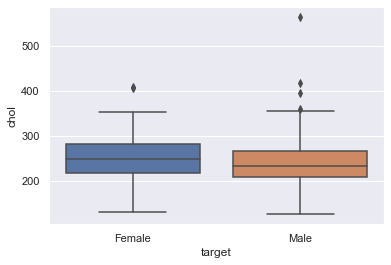

In [12]:
plot = sns.boxplot(x='target', y='chol',data=df )
plot.set_xticklabels(['Female', 'Male']);

### Correlation matrix
This visually helps to find the most important features (without mixing them by a preprocess like PCA)

The highest correlation between 'target' and 'features' comes from
 exang     -0.436757
cp         0.433798
oldpeak   -0.430696
thalach    0.421741
ca        -0.391724
Name: target, dtype: float64 



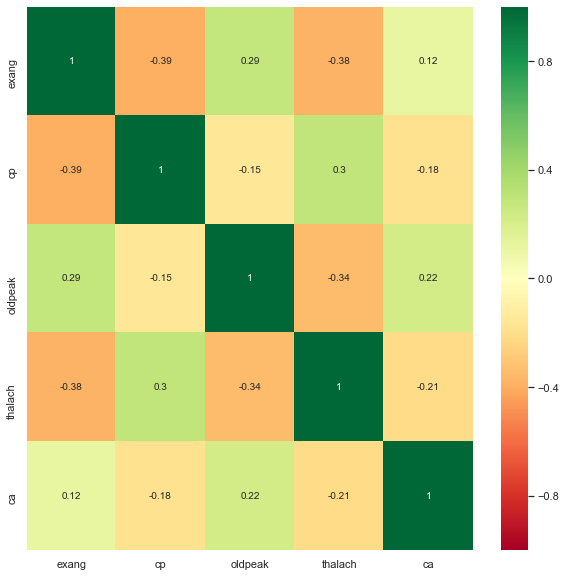

In [13]:
def heat_corr(X, y, n_features=6 ):
    '''This function takes the features matrix (X) and the target vector (y) and gives back an ORDERED correlation heat map.
    Needs seaborn, pandas and numpy
    X = features
    y = target
    n_features = number of features to focus on
    '''
    corrmatrix = pd.concat([X, y],axis=1).corr()
    # Get the names
    top_corr_features = corrmatrix.index
    plt.figure(figsize=(10,10))
      
    # Take the absolute value of the correlation matrix
    A = corrmatrix.apply(np.absolute)
    # Highest correlated functions to the target!!!
    # This means we get a "measure" of how important each feature is
    important = A.sort_values('target', ascending=False).iloc[1:].index.to_list()
    l = corrmatrix[important].loc['target']
#     ordered_matrix = corrmatrix #corrmatrix[important].reindex(important).iloc[:n_features,:n_features]#.sort_values(by=important)        
    ordered_matrix = corrmatrix[important].reindex(important).iloc[:n_features,:n_features]#.sort_values(by=important)    
    
    # Plot heat map
    plot = sns.heatmap(ordered_matrix,annot=True,cmap="RdYlGn", vmin=-1, vmax=1)
        
    return (plot, print('The highest correlation between \'target\' and \'features\' comes from\n', l[:n_features], '\n') )
    
heat_corr(df.drop('target', axis=1), df.target, n_features=5);

It doesn't really seem like what we thought about 'sex', 'age' and 'chol' is not entirely true.

# ML models

Before starting to train a model it is important to choose the size of the training set. Here  I have decided to make an 80% (train) - 20% (test) division. 

In [14]:
#ML imports
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler 

y = df.target
X = df.drop('target', axis=1)

# Divide the data to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Here we fit and transform the X_train and with those same parameters we transform X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit and transform
X_test = sc.transform(X_test) #transform

## Naive Bayes

We apply Gaussian NB

 Raw accuracy for GNB = 85.246% 
 accuracy_score function for GNB gives = 85.246% 
 f1_score function for GNB gives = 87.324% 
 Model parameters = {'priors': None, 'var_smoothing': 1e-09} 



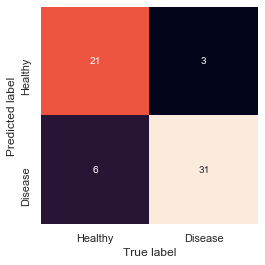

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

#In the following plot the Transpose of the matrix gives the correct labeling that I like in the figure
mat = confusion_matrix(y_test, y_predicted).T
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Healthy', 'Disease'] , yticklabels=['Healthy', 'Disease'] )

plt.xlabel('True label')
plt.ylabel('Predicted label');

#print(y_predicted.sum(), y_test.sum() )

print(' Raw accuracy for GNB = {:.3f}%'.format( (mat[0,0] + mat[1,1])/len(y_test)*100 )
      ,'\n accuracy_score function for GNB gives = {:.3f}%'.format(accuracy_score(y_test, y_predicted)*100 )
      ,'\n f1_score function for GNB gives = {:.3f}%'.format( f1_score(y_test, y_predicted)*100 )
      ,'\n Model parameters =', model.get_params(),'\n'
     )

#We can compare with the usual metrics result:
#print(metrics.classification_report(y_predicted, y_test, digits=5) )

## SVC

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#We'll use a radial kernel 
model = SVC(kernel='rbf',  C=1, random_state=0)
model.fit(X_train, y_train) # Train the model to begin the test

# model.get_params().keys()  # What can be tuned?

# Optimisation of hyper-parameters fot this dataset
param_grid = {'C': [.1,.25,.5, 1, 5, 10, 50, 100],
              'gamma': [0.0001, 0.0005, 0.001, 0.005,.05]}
grid = GridSearchCV(model, param_grid, cv=7)

In [17]:
model.get_params().keys() # What can be tuned?

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [18]:
%time grid.fit(X_train, y_train)
grid.best_params_  #Best params!

Wall time: 1.04 s


C:\Users\cuspi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'gamma': 0.05}

 Raw accuracy for SVC = 83.607% 
 accuracy_score function for SVC gives = 83.607% 
 f1_score function for SVC gives = 86.486% 

 Model parameters = {'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.05, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


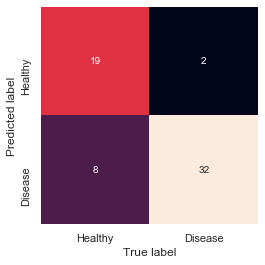

In [19]:
model = grid.best_estimator_ #Best model in town 😎

y_predicted = model.predict(X_test)

#In the following plot the Transpose of the matrix gives the correct labeling that I like in the figure
mat = confusion_matrix(y_test, y_predicted).T
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Healthy', 'Disease'] , yticklabels=['Healthy', 'Disease'] )

plt.xlabel('True label')
plt.ylabel('Predicted label');

#print(y_predicted.sum(), y_test.sum() )

print(' Raw accuracy for SVC = {:.3f}%'.format( (mat[0,0] + mat[1,1])/len(y_test)*100 )
      ,'\n accuracy_score function for SVC gives = {:.3f}%'.format(accuracy_score(y_test, y_predicted)*100 )
      ,'\n f1_score function for SVC gives = {:.3f}%'.format( f1_score(y_test, y_predicted)*100 )
      ,'\n\n Model parameters =', model.get_params()     )

# print(accuracy_score(y_test, y_predicted), '\n', f1_score(y_test, y_predicted) )
##f1score

## Logistic regression

Arguably the best model to predict an outcome in this problem will be a logistic regression. 

 Raw accuracy for LogReg = 83.607% 
 accuracy_score function for LogReg gives = 83.607% 
 f1_score function for LogReg gives = 85.714% 

 Model parameters = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


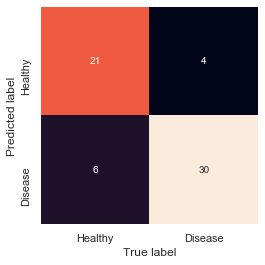

In [20]:
from sklearn.linear_model import LogisticRegression

#Use the model:
model = LogisticRegression(solver='saga' ,penalty='elasticnet', l1_ratio=0.1)
model.fit(X_train, y_train)
# model.get_params().keys()  # What can be tuned?

y_predicted = model.fit(X_train, y_train).predict(X_test)

#In the following plot the Transpose of the matrix gives the correct labeling that I like in the figure
mat = confusion_matrix(y_test, y_predicted).T
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Healthy', 'Disease'] , yticklabels=['Healthy', 'Disease'] )

plt.xlabel('True label')
plt.ylabel('Predicted label');

#print(y_predicted.sum(), y_test.sum() )

print(' Raw accuracy for LogReg = {:.3f}%'.format( (mat[0,0] + mat[1,1])/len(y_test)*100 )
      ,'\n accuracy_score function for LogReg gives = {:.3f}%'.format(accuracy_score(y_test, y_predicted)*100 )
      ,'\n f1_score function for LogReg gives = {:.3f}%'.format( f1_score(y_test, y_predicted)*100 )
      ,'\n\n Model parameters =', model.get_params()     )

# print(accuracy_score(y_test, y_predicted), '\n', f1_score(y_test, y_predicted) )
##f1score

## Random Forests

 Raw accuracy for RandForest = 88.525% 
 accuracy_score function for RandForest gives = 88.525% 
 f1_score function for RandForest gives = 89.855% 

 Model parameters = {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


C:\Users\cuspi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


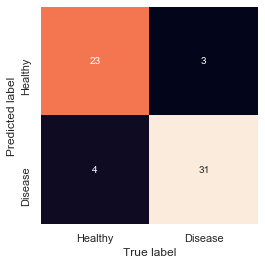

In [21]:
from sklearn.ensemble import RandomForestClassifier

#Use the model:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
# model.get_params().keys()  # What can be tuned?

# Optimisation of hyper-parameters fot this dataset
param_grid = {'n_estimators': [10,50,100, 200] }
grid = GridSearchCV(model, param_grid, cv=7)

grid.fit(X_train, y_train)


#we can actually straightforward use the gridsearch as a model!!! #🤦‍
y_predicted = grid.predict(X_test)

#In the following plot the Transpose of the matrix gives the correct labeling that I like in the figure
mat = confusion_matrix(y_test, y_predicted).T
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Healthy', 'Disease'] , yticklabels=['Healthy', 'Disease'] )

plt.xlabel('True label')
plt.ylabel('Predicted label');

#print(y_predicted.sum(), y_test.sum() )

print(' Raw accuracy for RandForest = {:.3f}%'.format( (mat[0,0] + mat[1,1])/len(y_test)*100 )
      ,'\n accuracy_score function for RandForest gives = {:.3f}%'.format(accuracy_score(y_test, y_predicted)*100 )
      ,'\n f1_score function for RandForest gives = {:.3f}%'.format( f1_score(y_test, y_predicted)*100 )
      ,'\n\n Model parameters =', model.get_params()     )

# print(accuracy_score(y_test, y_predicted), '\n', f1_score(y_test, y_predicted) )
##f1score

## KDE Classifier

Now let's bring the bazooka of a Bayesian KDE to hopefully get a better result in this task.

We begin by defining the following class:


In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

#Class to make a not naive Bayes estimator
#It is most ocnvenient to inherit from BaseEstimator and ClassifierMixin
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    #After insatiating, make a copy of the parameters
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    # Train the data    
    def fit(self, X, y):
        #Get the classes
        self.classes_ = np.sort(np.unique(y))
        #Divide the training set X into dif classes
        training_sets = [X[y == yi] for yi in self.classes_]
        #Make a KDE for each class
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        #Get the class priors (probability of that class)
        # we use log because later, score_samples uses log 
        self.logpriors_ = [np.log( Xi.shape[0] / X.shape[0] )
                           for Xi in training_sets]
        return self #ALWAYS return self so we can chain instances or commands
    
    #Predicting labels on new data    
    #Predict_proba gives the matrix of the log prob of each element 
    #   to belong to each diff class 
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T #The shape is [n_samples, n_classes]. 
        #Entry [i,j] is the posterior probability that sample i is a member of class j
        #result is P(z|y)P(y)
        result = np.exp(logprobs + self.logpriors_)
        #return fractions
        return result / result.sum(1, keepdims=True)
    
    #Take the maximum value of each row
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

C:\Users\cuspi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bandwidth': 1.4490181504861988}
accuracy of best model (train step) = 0.8223140495867769
 Raw accuracy for KDEClassiffier = 80.328% 
 accuracy_score function for KDEClassiffier gives = 80.328% 
 f1_score function for KDEClassiffier gives = 83.784%


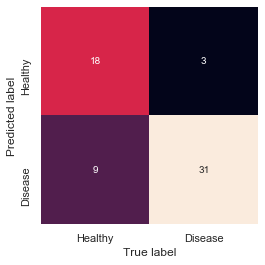

In [31]:
# We now use the grid to find the best bandwidth and 
#fit it to our problem: 
bandwidths = 10** np.linspace(0,2,150)
grid = GridSearchCV(KDEClassifier(),   
                   {'bandwidth':bandwidths})
#fit
grid.fit(X_train, y_train)
#To get scores we need to transform to a dataframe...
cv_results = pd.DataFrame(grid.cv_results_)

#Get scores
scores = cv_results['mean_test_score'].tolist()

#Print best bandwidth and best score of cross-validation
print(grid.best_params_); #Best model in town 😎
print('accuracy of best model (train step) =', grid.best_score_) # accuracy of the best

#Switch to best estimator (not necessary actually) 
grid = grid.best_estimator_

#Predict
y_predicted = grid.predict(X_test)

#In the following plot the Transpose of the matrix gives the correct labeling that I like in the figure
mat = confusion_matrix(y_test, y_predicted).T
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Healthy', 'Disease'] , yticklabels=['Healthy', 'Disease'] )

plt.xlabel('True label')
plt.ylabel('Predicted label');

#print(y_predicted.sum(), y_test.sum() )

print(' Raw accuracy for KDEClassiffier = {:.3f}%'.format( (mat[0,0] + mat[1,1])/len(y_test)*100 )
      ,'\n accuracy_score function for KDEClassiffier gives = {:.3f}%'.format(accuracy_score(y_test, y_predicted)*100 )
      ,'\n f1_score function for KDEClassiffier gives = {:.3f}%'.format( f1_score(y_test, y_predicted)*100 )    )


## Summary

The findings of this quick study help to compare different models  of machine learning (individually), which make it seem as though Random Forests were:
1. Gaussian Naive Bayes
2. Random Forests
3. Support Vector Classifier
4. Logistic regression,
in that order.

Without making any sort of PCA, we have also seen that using the `heat_corr` function, the most important variables are:
1. Exercise induced angina
2. Chest pain 
3. ST depression induced by exercise relative to rest
4. Maximum heart rate achieved 
5. Number of major vessels colored by flourosopy

As we can see on the heatmap below, the correlation amongst some of them is slightly important and so we would need to make use of a method to deal with it.

Finally, we should say that the data set number of instances being 303 is low to make any significative predictions. 

The highest correlation between 'target' and 'features' comes from
 exang     -0.436757
cp         0.433798
oldpeak   -0.430696
thalach    0.421741
ca        -0.391724
Name: target, dtype: float64 



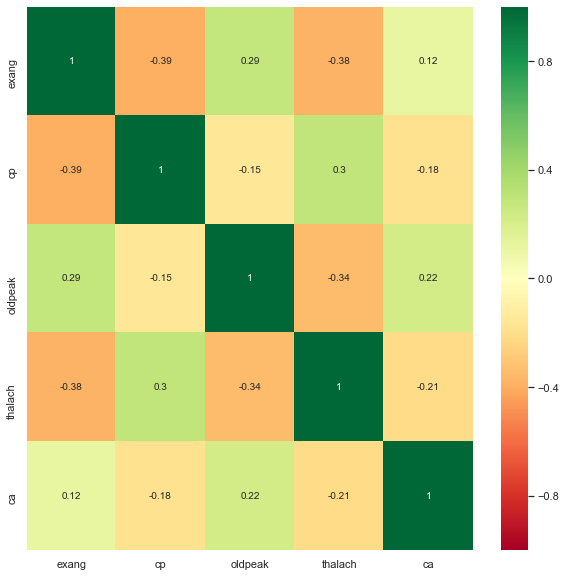

In [23]:
heat_corr(df.drop('target', axis=1), df.target,5);

Text(0, 0.5, 'Cumulative explained variance')

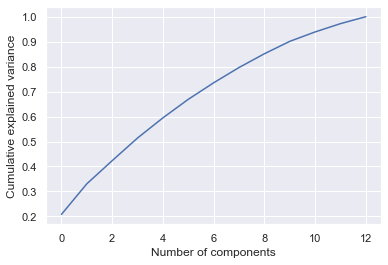

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13, random_state=0, svd_solver='randomized'
          , whiten=True)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

So it seems we shouldn't really do a PCA dimensional reduction.